# Load and inspect NASA data

In [54]:
import json
import pandas as pd
import matplotlib.pyplot as plt

with open('../data/nasa_data.json') as f:
    nasa_data = json.load(f)

nasa_df = pd.DataFrame([
    {"metric": metric, "year": date, "value": float(value)}
    for metric, values in nasa_data.items()
    for date, value in values.items()
])
nasa_df.head()

,metric,year,value
0,global-temperature,1880,-0.11
1,global-temperature,1881,-0.14
2,global-temperature,1882,-0.18
3,global-temperature,1883,-0.21
4,global-temperature,1884,-0.25


In [55]:
nasa_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2729 entries, 0 to 2728
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   metric  2729 non-null   object 
 1   year    2729 non-null   object 
 2   value   2729 non-null   float64
dtypes: float64(1), object(2)
memory usage: 64.1+ KB


Metric and year columns are strings and value column is float -> convert the to floats (because values in 1 column (year) must belong to the same type). No NaN values.

Lets explore each metric separately, find some trends and check the validity. But firstly, convert 'year' to float:

In [56]:
nasa_df['year'] = nasa_df['year'].apply(lambda x: float(x))

### Separate Exploration

In [57]:
# the data for 'Ocean Warming'
# is collected from 1958 to 2022 inclusively (1 record oer year), check the absense of any year in assert
ocean_warm = nasa_df.loc[nasa_df['metric'] == 'ocean-warming']
assert len(ocean_warm) == 2022-1958+1

# the data for 'Global Temperature' is collected from 1880 to 2024 inclusively (1 record oer year), 
# check the absense of any year in assert
global_temp = nasa_df.loc[nasa_df['metric'] == 'global-temperature']
assert len(global_temp) == 2024-1880+1

# the data for 'Methane' is collected from July 1983 to Oct 2024 (1 record per month) inclusively,check the absense of any month
# 1984-2023 years inclusively have 12 months included in the stats, 
# only 6 month from the 1983th year and 10 months from the 2024th year are taken 
methane = nasa_df.loc[nasa_df['metric'] == 'methane']
assert len(methane) == (2023-1984+1)*12+10+6

# the data for 'Carbon Dioxide' is collected from March 1958 to Jan 2025 inclusively (1 record per month),check the absense of any month
# 1959-2024 years inclusively have 12 months included in the stats, 
# only 10 month from the 1958th year and 1 month from the 2025th year are taken 
co2 = nasa_df.loc[nasa_df['metric'] == 'carbon-dioxide']
assert len(co2) == (2024-1959+1)*12+10+1

# the data for 'Carbon Dioxide' is collected from ~16th of Jan 1993 to ~Dec 2024 inclusively 
# it is hard to determine the correct amount of records, but measuurements were provided ~ every 10 days.
# in total there are 1174 measurements (~37 records per year)
sea_level = nasa_df.loc[nasa_df['metric'] == 'sea-level']

# the data for 'Arctic Sea Ice' is collected from 1979 to 2024 inclusively 
# the measurenent are taken ~in the middle of a year, so we can get rid of the ratio part
# (but keep in mind that it was the middle of summer) 
arctic_sea_ice = nasa_df.loc[nasa_df['metric'] == 'arctic-sea-ice']
assert len(arctic_sea_ice) == 2024-1979+1
arctic_sea_ice.iloc[:5,:]

,metric,year,value
145,arctic-sea-ice,1979.726,6.903
146,arctic-sea-ice,1980.679,7.544
147,arctic-sea-ice,1981.701,6.903
148,arctic-sea-ice,1982.704,7.166
149,arctic-sea-ice,1983.696,7.221


Convert float 'year' in the arctic_sea_ice to simple float (.0):

In [58]:
arctic_sea_ice['year'] = arctic_sea_ice['year'].apply(lambda x: float(round(float(x)) - 1))
arctic_sea_ice.head()

/tmp/ipykernel_31473/995844610.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  arctic_sea_ice['year'] = arctic_sea_ice['year'].apply(lambda x: float(round(float(x)) - 1))


,metric,year,value
145,arctic-sea-ice,1979.0,6.903
146,arctic-sea-ice,1980.0,7.544
147,arctic-sea-ice,1981.0,6.903
148,arctic-sea-ice,1982.0,7.166
149,arctic-sea-ice,1983.0,7.221


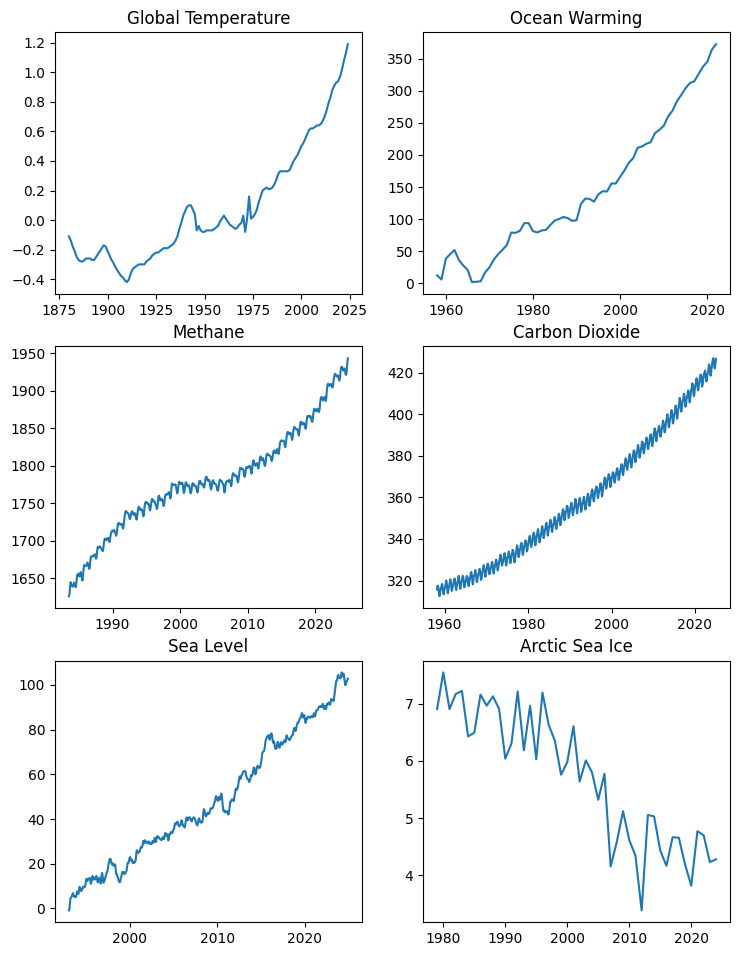

In [69]:
fig, axs = plt.subplots(3, 2)
fig.set_figheight(10)
fig.set_figwidth(10)
plt.subplots_adjust(bottom=0.01, right=0.8, top=0.9)

axs[0, 0].plot(global_temp.iloc[:,1], global_temp.iloc[:,2])
axs[0, 0].set_title('Global Temperature')

axs[0, 1].plot(ocean_warm.iloc[:,1], ocean_warm.iloc[:,2])
axs[0, 1].set_title('Ocean Warming')

axs[1, 0].plot(methane.iloc[:,1], methane.iloc[:,2])
axs[1, 0].set_title('Methane')

axs[1, 1].plot(co2.iloc[:,1], co2.iloc[:,2])
axs[1, 1].set_title('Carbon Dioxide')

axs[2, 0].plot(sea_level.iloc[:,1], sea_level.iloc[:,2])
axs[2, 0].set_title('Sea Level')

axs[2, 1].plot(arctic_sea_ice.iloc[:,1], arctic_sea_ice.iloc[:,2])
axs[2, 1].set_title('Arctic Sea Ice')

# plt.plot(methane.iloc[:,1], methane.iloc[:,2])
plt.show()

We can clearly see how each parameter grows (except the Ice Level - it decreases). These plots can be a basepoint for our final visualizations, because the most necessary and important information is captured here: Global Warming.

In [72]:
df = pd.concat([global_temp, ocean_warm, methane, co2, sea_level, arctic_sea_ice])
df.to_csv('../data/nasa_data.csv')